# Simple linear regression
* Now that we understand what is happening "under the hood" for linear regression, let's begin by coding through an exampple of **simple linear regression**
* To help with our understanding, we will start by directly using the advertising data mentioned in Chapter 3 of ISLR
* This lecture also serves to start motivating us to think about *performance evaluation* and *multivariate regression*.
* Simple Linear Regression
    * Limited to one X feature (y=mx+b)
    * We will create a best-fit line to map out linear relationship between *total advertising spend* and *resulting sales*

---
**Import environment**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

---
**Import background**

In [10]:
mpl.rcParams.update({"figure.facecolor": "white",})

In [11]:
df = pd.read_csv(filepath_or_buffer=r"C:\Users\admin\Desktop\Data Science\Course-2021\08-Linear-Regression-Models\Advertising.csv")

In [12]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* Because we only use the simple linear regression - combine all of spend to total spend

In [13]:
df['total_spend'] = df["TV"] + df ["radio"] + df["newspaper"]

In [14]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


* Concentrate on the simple linear regression

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

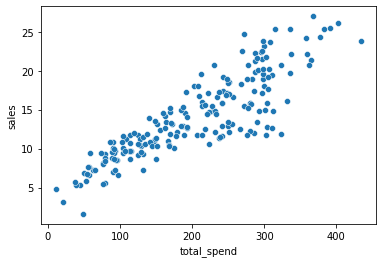

In [15]:

sns.scatterplot(data=df, x="total_spend", y="sales")


* Due to the simple linear regression (only one X vector and Y vector) - we could use the `regplot` to plot out the simple linear regression

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

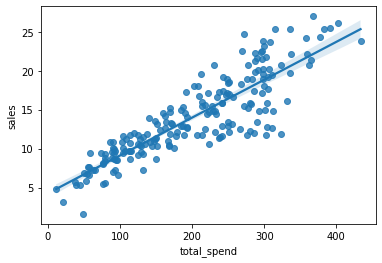

In [16]:
# show the line of best fit on top of that scatterplot
sns.regplot(data=df, x="total_spend", y="sales")

In [17]:
X = df["total_spend"]
y = df["sales"]


In [18]:
# y = mx + b
# y = B1x + B0
# using the deg = 1 to make it only concern about the x not x square or x cube
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [19]:
# return two values B1 and B0
np.polyfit(X,y, deg=1)

array([0.04868788, 4.24302822])

In [20]:
potential_spend = np.linspace(0,500,100)


In [21]:
# 0.04868788 is B1
# 4.24302822 is B0
predicted_sales = 0.04868788*potential_spend + 4.24302822

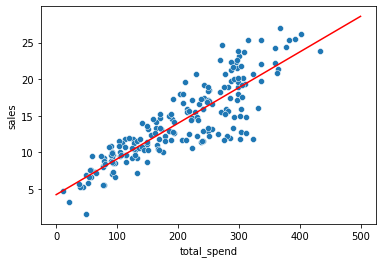

In [22]:
sns.scatterplot(data=df, x="total_spend", y = "sales") # analyze how visually how this regression line fits on top of the data
plt.plot(potential_spend, predicted_sales, color="red") # this simple regression is similar as the regplot

* Example of specific value

In [23]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [24]:
predicted_sales

13.98060422

In [25]:
# return back X cubed, X square, X and y
# Instead of solving the y = B1x + B0
# We solving the y = B3x**3 + B2*x**2 + B1*x + B0
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

* Remember if there is actually less information on something like X cubed or X squared
=> It is saying that there is no real higher order relationship there, then these beta coefficient values are going to be **Small**
* The relationship between X cubed (X**3) and y is not unaccountable
---
* Using the **polynomial equation**

In [26]:
pot_spend = np.linspace(0, 500, 100)

In [27]:
# this is the polynomial equation : y = B3x**3 + B2*x**2 + B1*x + B0
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

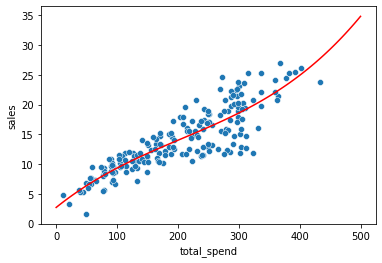

In [28]:
# increase the pot_spend => create curve
sns.scatterplot(data=df, x="total_spend", y = "sales")
plt.plot(pot_spend, pred_sales, color="red")

* How to consider which is more suitable fit - **polynomial model** or **simple linear fit model**
* So far we haven't really discussed a way to evaluate performance metrics for regression problems